In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [46]:
#importing data from the dataset
df = pd.read_csv(r"C:\Users\agarw\OneDrive\Desktop\Dissertation\data.csv")

In [47]:
#checking for bankrupt companies 0 is non-bankrupt and 1 is bankrupt
bankrupt_data = df['Bankrupt?'].value_counts()
bankrupt_data

0    6599
1     220
Name: Bankrupt?, dtype: int64

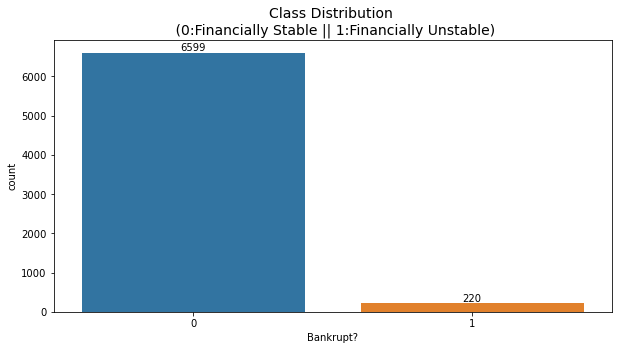

In [48]:
#Distribution representation
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Bankrupt?'])
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

In [49]:
# seperate the Bankrupt label from the dataset 
y = df['Bankrupt?']
X = df.drop(['Bankrupt?'], axis = 1)

In [50]:
# divinding our dataset into training dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

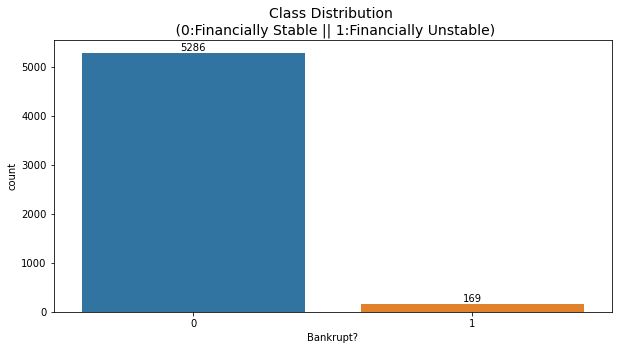

In [51]:
plt.figure(figsize = (10,5))
ax = sns.countplot(y_train)
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

In [52]:
# divinding our dataset into testing and validation 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [53]:
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

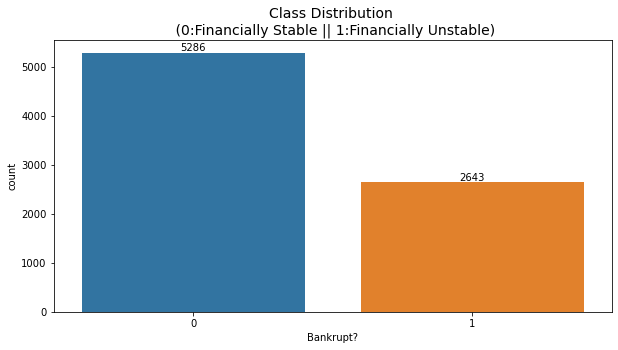

In [54]:
plt.figure(figsize = (10,5))
ax = sns.countplot(y_train_resampled)
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

In [55]:
# Standardize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [56]:
rbm = BernoulliRBM(n_components=95, n_iter=10, random_state=42)
rbm.fit(X_train_resampled)

BernoulliRBM(n_components=95, random_state=42)

In [57]:
# Transform the data using the trained RBM
X_train_transformed = rbm.transform(X_train_resampled)
X_val_transformed = rbm.transform(X_val)
X_test_transformed = rbm.transform(X_test)

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_transformed.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

In [59]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
model.fit(X_train_transformed, y_train_resampled, epochs=25, batch_size=32, verbose=2)

Epoch 1/25
248/248 - 1s - loss: 0.3853 - accuracy: 0.8505 - 876ms/epoch - 4ms/step
Epoch 2/25
248/248 - 0s - loss: 0.3387 - accuracy: 0.8662 - 299ms/epoch - 1ms/step
Epoch 3/25
248/248 - 0s - loss: 0.3359 - accuracy: 0.8681 - 305ms/epoch - 1ms/step
Epoch 4/25
248/248 - 0s - loss: 0.3321 - accuracy: 0.8700 - 278ms/epoch - 1ms/step
Epoch 5/25
248/248 - 0s - loss: 0.3334 - accuracy: 0.8678 - 267ms/epoch - 1ms/step
Epoch 6/25
248/248 - 0s - loss: 0.3308 - accuracy: 0.8730 - 276ms/epoch - 1ms/step
Epoch 7/25
248/248 - 0s - loss: 0.3276 - accuracy: 0.8736 - 273ms/epoch - 1ms/step
Epoch 8/25
248/248 - 0s - loss: 0.3300 - accuracy: 0.8736 - 262ms/epoch - 1ms/step
Epoch 9/25
248/248 - 0s - loss: 0.3299 - accuracy: 0.8729 - 262ms/epoch - 1ms/step
Epoch 10/25
248/248 - 0s - loss: 0.3274 - accuracy: 0.8724 - 257ms/epoch - 1ms/step
Epoch 11/25
248/248 - 0s - loss: 0.3281 - accuracy: 0.8717 - 266ms/epoch - 1ms/step
Epoch 12/25
248/248 - 0s - loss: 0.3281 - accuracy: 0.8745 - 258ms/epoch - 1ms/step
E

In [61]:
#Validation dataset
y_val_pred = (model.predict(X_val_transformed) > 0.5).astype(int)

22/22 [==============================] - 0s 812us/step


In [62]:
# Evaluate the model's performance on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1_value = f1_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print("Accuracy", val_accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)
print("Validation Classification Report:\n", val_report)

Accuracy 0.8563049853372434
Precision 0.15789473684210525
Recall 0.9
F1 Score 0.26865671641791045
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92       662
           1       0.16      0.90      0.27        20

    accuracy                           0.86       682
   macro avg       0.58      0.88      0.59       682
weighted avg       0.97      0.86      0.90       682



In [63]:
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[566  96]
 [  2  18]]


In [64]:
y_test_pred = (model.predict(X_test_transformed) > 0.5).astype(int)

22/22 [==============================] - 0s 715us/step


In [65]:
# Evaluate the model's performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1_value = f1_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print("Accuracy", test_accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)
print("Test Classification Report:\n", test_report)

Accuracy 0.8592375366568915
Precision 0.226890756302521
Recall 0.8709677419354839
F1 Score 0.36
Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       651
           1       0.23      0.87      0.36        31

    accuracy                           0.86       682
   macro avg       0.61      0.86      0.64       682
weighted avg       0.96      0.86      0.90       682



In [66]:
conf_matrix = confusion_matrix(y_val, y_test_pred)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[547 115]
 [ 16   4]]
